             X       Y          Z AA       Mass
0    23.388000 -19.139  -9.239000  M  149.20784
1    24.634001 -16.649  -6.582000  K  146.18934
2    23.024000 -14.147  -4.186000  A   89.09404
3    19.518999 -14.167  -2.949000  F  165.19184
4    20.761999 -13.862   0.649000  T  119.12034
..         ...     ...        ... ..        ...
205  -0.389000  -7.560   8.314000  V  117.14784
206  -1.093000  -4.358  10.287000  N  132.11904
207  -0.387000  -3.627  13.961000  Y  181.19124
208  -2.372000  -0.894  15.827000  Y  181.19124
209  -0.804000   1.196  18.641001  F  165.19184

[210 rows x 5 columns]
(210, 8)
        X        Y       Z AA   Avg_Mass   Avg_Neighbor_Dist  \
0  23.388  -19.139  -9.239  M  149.20784  3.8486709594726562   
1  24.634  -16.649  -6.582  K  146.18934   3.834369659423828   
2  23.024  -14.147  -4.186  A   89.09404  3.7685012817382812   
3  19.519  -14.167  -2.949  F  165.19184  3.7678961753845215   
4  20.762  -13.862   0.649  T  119.12034  3.8312950134277344   

    Ma

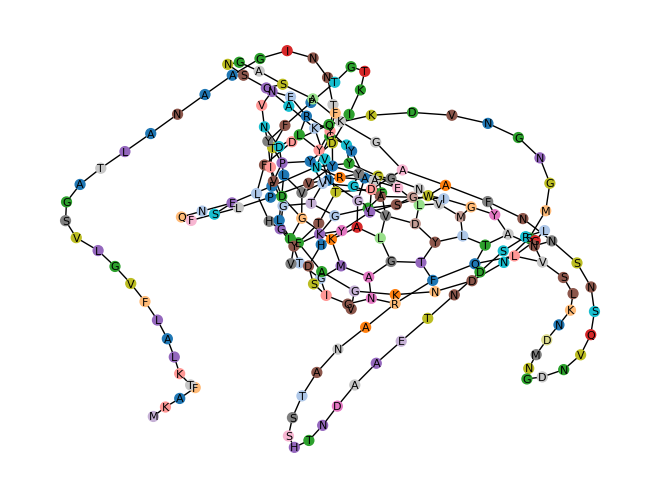

In [159]:
# Import necessary libraries
import os
import pandas as pd
from ProteinAnalyzer import ProteinAnalyzer
from GraphCreator import *
import torch
from torch_geometric.data import DataLoader
import torch.nn as nn
import torch.optim as optim
import torch.nn as nn
import torch.optim as optim
#from GraphVAE import GraphVAE

pdb_file = '/Users/alexchilton/Downloads/archive/train/AF-D0ZA02-F1-model_v4.pdb'
aa_info_file = 'aa_mass_letter.csv'
analyzer = ProteinAnalyzer(pdb_file, aa_info_file)
graph_creator = GraphCreator(pdb_file, aa_info_file)

# Generate the autoencoder input DataFrame
autoencoder_input_df = analyzer.prepare_autoencoder_input()

pd.set_option('display.max_columns', None)

print(autoencoder_input_df.shape)
print(autoencoder_input_df.head())


graph, le = graph_creator.create_graph(autoencoder_input_df)

# Print graph metrics
graph_creator.print_graph_metrics(graph)

# Draw the graph
graph_creator.draw_graph(graph, le)


In [160]:
def load_pdb_files(directory):
    pdb_files = [os.path.join(directory, f) for f in os.listdir(directory) if f.endswith('.pdb')]
    return pdb_files

def create_graphs_from_pdbs(pdb_files, aa_info_file):
    graphs = []
    for pdb_file in pdb_files:
        print(f"Parsing file: {pdb_file}")
        analyzer = ProteinAnalyzer(pdb_file, aa_info_file)
        graph_creator = GraphCreator(pdb_file, aa_info_file)

        # Generate the autoencoder input DataFrame
        autoencoder_input_df = analyzer.prepare_autoencoder_input()

        # Create the graph
        graph, _ = graph_creator.create_graph(autoencoder_input_df)

        # Append the graph to the list
        graphs.append(graph)

    return graphs

# Directory containing PDB files
pdb_directory = '/Users/alexchilton/Downloads/archive/just100'
aa_info_file = 'aa_mass_letter.csv'

# Load PDB files
pdb_files = load_pdb_files(pdb_directory)

# Create graphs from PDB files
graphs = create_graphs_from_pdbs(pdb_files, aa_info_file)

# Now `graphs` contains all the graphs created from the PDB files

Parsing file: /Users/alexchilton/Downloads/archive/just100/AF-P86127-F1-model_v4.pdb
         X      Y       Z AA       Mass
0   -3.361  0.103   5.039  I  131.17464
1   -0.566 -2.557   5.206  I  131.17464
2   -1.398 -3.989   1.720  E  147.13074
3   -1.416 -0.429   0.246  K  146.18934
4    1.985  0.279   1.908  L  131.17464
5    3.484 -3.071   0.728  V  117.14784
6    2.124 -2.571  -2.836  N  132.11904
7    3.463  1.055  -2.853  T  119.12034
8    6.910 -0.168  -1.670  A   89.09404
9    6.932 -3.113  -4.147  L  131.17464
10   5.683 -0.697  -6.877  G   75.06714
11   8.570  1.760  -6.183  L  131.17464
12  11.161 -1.090  -6.155  L  131.17464
13   9.714 -2.762  -9.317  S  105.09344
14  10.170  0.130 -11.838  G   75.06714
15   8.169  3.306 -11.184  L  131.17464
Parsing file: /Users/alexchilton/Downloads/archive/just100/AF-P86160-F1-model_v4.pdb
         X      Y      Z AA       Mass
0   13.000 -1.172 -7.426  F  165.19184
1   10.319 -3.992 -7.708  V  117.14784
2   10.134 -4.877 -3.913  P  115.

In [161]:
for i, graph in enumerate(graphs):
    print(f"Graph {i + 1}: {graph.num_nodes} nodes, {graph.num_edges} edges")

Graph 1: 16 nodes, 32 edges
Graph 2: 17 nodes, 34 edges
Graph 3: 17 nodes, 32 edges
Graph 4: 21 nodes, 42 edges
Graph 5: 17 nodes, 34 edges
Graph 6: 20 nodes, 38 edges
Graph 7: 16 nodes, 32 edges
Graph 8: 17 nodes, 32 edges
Graph 9: 17 nodes, 34 edges
Graph 10: 16 nodes, 32 edges
Graph 11: 18 nodes, 34 edges
Graph 12: 20 nodes, 40 edges
Graph 13: 17 nodes, 32 edges
Graph 14: 16 nodes, 32 edges
Graph 15: 20 nodes, 38 edges
Graph 16: 17 nodes, 32 edges
Graph 17: 17 nodes, 32 edges
Graph 18: 18 nodes, 34 edges
Graph 19: 16 nodes, 36 edges
Graph 20: 17 nodes, 32 edges
Graph 21: 20 nodes, 38 edges
Graph 22: 18 nodes, 34 edges
Graph 23: 20 nodes, 40 edges
Graph 24: 17 nodes, 32 edges
Graph 25: 18 nodes, 34 edges
Graph 26: 21 nodes, 42 edges
Graph 27: 16 nodes, 36 edges
Graph 28: 21 nodes, 40 edges
Graph 29: 20 nodes, 38 edges
Graph 30: 16 nodes, 30 edges
Graph 31: 18 nodes, 40 edges
Graph 32: 20 nodes, 38 edges
Graph 33: 17 nodes, 32 edges
Graph 34: 18 nodes, 34 edges
Graph 35: 18 nodes, 34 

In [162]:
# Assuming `graphs` is a list of graph objects created earlier
dataset = graphs

# Create a DataLoader for batching the graphs
batch_size = 32
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

/opt/anaconda3/envs/untitled/lib/python3.8/site-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


In [163]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv, global_mean_pool
import torch.nn as nn
import torch.optim as optim
class GraphVAE(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(GraphVAE, self).__init__()
        self.encoder = nn.Sequential(
            GCNConv(in_channels, hidden_channels),
            nn.ReLU(),
            GCNConv(hidden_channels, hidden_channels),
            nn.ReLU()
        )
        self.fc_mu = nn.Linear(hidden_channels, out_channels)
        self.fc_logvar = nn.Linear(hidden_channels, out_channels)
        self.decoder = nn.Sequential(
            nn.Linear(out_channels, hidden_channels),
            nn.ReLU(),
            nn.Linear(hidden_channels, in_channels)  # Match the input feature dimension
        )

    def encode(self, x, edge_index, batch):
        x = self.encoder[0](x, edge_index)
        x = self.encoder[1](x)
        x = self.encoder[2](x, edge_index)
        x = self.encoder[3](x)
        x = global_mean_pool(x, batch)  # Pooling to get graph-level embedding
        return self.fc_mu(x), self.fc_logvar(x)

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std).to(mu.device)  # Ensure `eps` is on the same device
        return mu + eps * std

    def decode(self, z, batch):
        # Ensure that `batch` is a 1D tensor of non-negative integers
        if batch.ndim != 1:
            batch = batch.view(-1)
        if batch.dtype != torch.long:
            batch = batch.long()
    
        # Count nodes per graph in the batch
        node_counts = torch.bincount(batch)  # Count nodes per graph in batch
    
      # Expand each graph's latent vector z to match the number of nodes in each graph
        repeated_z = torch.cat([z[i].repeat(count, 1) for i, count in enumerate(node_counts)], dim=0)

        # Pass expanded z through the decoder
        recon = self.decoder(repeated_z)
        return recon




    def forward(self, x, edge_index, batch):
        # Confirm `batch` is a tensor, convert if necessary
        if not isinstance(batch, torch.Tensor):
            batch = torch.tensor(batch, device=x.device, dtype=torch.long)

        mu, logvar = self.encode(x, edge_index, batch)
        z = self.reparameterize(mu, logvar)
        return self.decode(z, batch), mu, logvar


In [164]:


# Training loop setup
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Assume `dataset` and `dataloader` are pre-defined PyTorch Geometric dataset and loader
in_channels = dataset[0].num_node_features
hidden_channels = 64
out_channels = 32
model = GraphVAE(in_channels, hidden_channels, out_channels).to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_function = nn.MSELoss()
beta = 1.0  # KL divergence weighting factor



In [165]:
num_epochs = 200
model.train()
for epoch in range(num_epochs):
    total_loss = 0
    for data in dataloader:
        data = data.to(device)
        optimizer.zero_grad()

        # Print number of nodes and edges for each graph in the batch
        for i in range(data.num_graphs):
            num_nodes = (data.batch == i).sum().item()
            #print(f"Graph {i + 1}: {num_nodes} nodes")

        # Forward pass
        recon, mu, logvar = model(data.x, data.edge_index, data.batch)

        # Reconstruction loss
        loss_recon = loss_function(recon, data.x)

        # KL divergence loss
        kld = -0.5 * torch.mean(1 + logvar - mu.pow(2) - logvar.exp())
        loss = loss_recon + beta * kld

        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f"Epoch {epoch + 1}, Loss: {total_loss / len(dataloader)}")


Epoch 1, Loss: 6061.981201171875
Epoch 2, Loss: 2011.4744262695312
Epoch 3, Loss: 1889.3480529785156
Epoch 4, Loss: 1728.1763305664062
Epoch 5, Loss: 1686.20166015625
Epoch 6, Loss: 1452.1430053710938
Epoch 7, Loss: 1277.8164978027344
Epoch 8, Loss: 1045.6741333007812
Epoch 9, Loss: 798.9042205810547
Epoch 10, Loss: 551.830078125
Epoch 11, Loss: 396.0872802734375
Epoch 12, Loss: 357.3552017211914
Epoch 13, Loss: 365.51939392089844
Epoch 14, Loss: 349.69776916503906
Epoch 15, Loss: 320.6158447265625
Epoch 16, Loss: 288.9424591064453
Epoch 17, Loss: 282.6072998046875
Epoch 18, Loss: 270.0113067626953
Epoch 19, Loss: 265.1760787963867
Epoch 20, Loss: 249.63914108276367
Epoch 21, Loss: 244.30934143066406
Epoch 22, Loss: 234.57913970947266
Epoch 23, Loss: 233.34473419189453
Epoch 24, Loss: 219.46825408935547
Epoch 25, Loss: 215.64404678344727
Epoch 26, Loss: 208.70095443725586
Epoch 27, Loss: 204.70615005493164
Epoch 28, Loss: 209.4002799987793
Epoch 29, Loss: 201.16001510620117
Epoch 30, L

Epoch 1, Loss: 112.09805679321289
Epoch 2, Loss: 110.23711967468262
Epoch 3, Loss: 102.58510398864746
Epoch 4, Loss: 105.08298110961914
Epoch 5, Loss: 105.48918724060059
Epoch 6, Loss: 103.61096572875977
Epoch 7, Loss: 105.75911521911621
Epoch 8, Loss: 107.23525428771973
Epoch 9, Loss: 115.07447624206543
Epoch 10, Loss: 109.28308868408203
Epoch 11, Loss: 110.330810546875
Epoch 12, Loss: 110.96320724487305
Epoch 13, Loss: 103.72865867614746
Epoch 14, Loss: 107.83264541625977
Epoch 15, Loss: 101.1357479095459
Epoch 16, Loss: 112.22123527526855
Epoch 17, Loss: 111.27264595031738
Epoch 18, Loss: 104.68038177490234
Epoch 19, Loss: 107.1745376586914
Epoch 20, Loss: 104.32013130187988
Epoch 21, Loss: 106.02586364746094
Epoch 22, Loss: 107.29000282287598
Epoch 23, Loss: 111.84219169616699
Epoch 24, Loss: 102.74405479431152
Epoch 25, Loss: 102.84250450134277
Epoch 26, Loss: 101.42519569396973
Epoch 27, Loss: 107.12438011169434
Epoch 28, Loss: 101.5111312866211
Epoch 29, Loss: 109.49174308776855

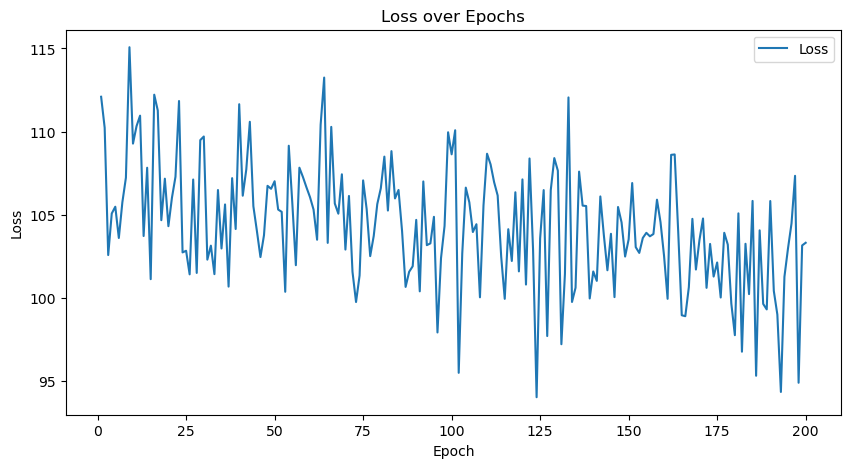

In [166]:
import matplotlib.pyplot as plt

# List to store loss values
loss_values = []

num_epochs = 200
model.train()
for epoch in range(num_epochs):
    total_loss = 0
    for data in dataloader:
        data = data.to(device)
        optimizer.zero_grad()

        # Forward pass
        recon, mu, logvar = model(data.x, data.edge_index, data.batch)

        # Reconstruction loss
        loss_recon = loss_function(recon, data.x)

        # KL divergence loss
        kld = -0.5 * torch.mean(1 + logvar - mu.pow(2) - logvar.exp())
        loss = loss_recon + beta * kld

        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    avg_loss = total_loss / len(dataloader)
    loss_values.append(avg_loss)
    print(f"Epoch {epoch + 1}, Loss: {avg_loss}")

# Plot the loss values
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), loss_values, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.show()

In [167]:
import torch
from torch_geometric.data import Data

# Function to generate new protein graphs
def generate_new_graphs(model, num_graphs, latent_dim, num_nodes):
    model.eval()  # Set the model to evaluation mode
    new_graphs = []

    with torch.no_grad():
        for _ in range(num_graphs):
            # Sample a random latent vector from a standard normal distribution
            z = torch.randn(1, latent_dim).to(device)

            # Decode the latent vector to generate a new graph
            recon = model.decode(z, torch.tensor([0]).to(device))  # Batch size of 1

            # Convert the reconstructed features back to a PyTorch Geometric graph format
            x = torch.tensor(recon, dtype=torch.float)

            # Generate a realistic edge_index tensor
            edge_index = torch.combinations(torch.arange(num_nodes), r=2).t().contiguous()

            new_graph = Data(x=x, edge_index=edge_index)
            new_graphs.append(new_graph)

    return new_graphs

# Generate 10 new protein graphs with a specified number of nodes
num_new_graphs = 10
latent_dim = out_channels  # Dimension of the latent space
num_nodes = 10  # Specify the number of nodes you want in each graph
new_graphs = generate_new_graphs(model, num_new_graphs, latent_dim, num_nodes)

# Print the generated graphs
for i, graph in enumerate(new_graphs):
    print(f"Generated Graph {i + 1}:")
    print(graph)

Generated Graph 1:
Data(x=[1, 8], edge_index=[2, 45])
Generated Graph 2:
Data(x=[1, 8], edge_index=[2, 45])
Generated Graph 3:
Data(x=[1, 8], edge_index=[2, 45])
Generated Graph 4:
Data(x=[1, 8], edge_index=[2, 45])
Generated Graph 5:
Data(x=[1, 8], edge_index=[2, 45])
Generated Graph 6:
Data(x=[1, 8], edge_index=[2, 45])
Generated Graph 7:
Data(x=[1, 8], edge_index=[2, 45])
Generated Graph 8:
Data(x=[1, 8], edge_index=[2, 45])
Generated Graph 9:
Data(x=[1, 8], edge_index=[2, 45])
Generated Graph 10:
Data(x=[1, 8], edge_index=[2, 45])


/var/folders/lp/38fnv8v91rqdkwbf17xlnxyh0000gn/T/ipykernel_83901/1860335571.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(recon, dtype=torch.float)


In [168]:
for i, graph in enumerate(new_graphs):
    print(f"Graph {i + 1}: {graph.num_nodes} nodes, {graph.num_edges} edges")

Graph 1: 1 nodes, 45 edges
Graph 2: 1 nodes, 45 edges
Graph 3: 1 nodes, 45 edges
Graph 4: 1 nodes, 45 edges
Graph 5: 1 nodes, 45 edges
Graph 6: 1 nodes, 45 edges
Graph 7: 1 nodes, 45 edges
Graph 8: 1 nodes, 45 edges
Graph 9: 1 nodes, 45 edges
Graph 10: 1 nodes, 45 edges


In [169]:
import itertools
import torch
import torch.optim as optim
import torch.nn as nn
from torch_geometric.data import DataLoader

# Define the hyperparameter grid
learning_rates = [0.001, 0.0001]
batch_sizes = [16, 32]
hidden_channels_list = [32, 64]
betas = [0.5, 1.0]
num_epochs = 200

# Function to train the model with given hyperparameters
def train_model(learning_rate, batch_size, hidden_channels, beta):
    # Create DataLoader with the specified batch size
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

    # Initialize the model, optimizer, and loss function
    model = GraphVAE(in_channels, hidden_channels, out_channels).to(device)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    loss_function = nn.MSELoss()

    # Training loop
    model.train()
    total_loss = 0
    for epoch in range(num_epochs):
        for data in dataloader:
            data = data.to(device)
            optimizer.zero_grad()

            # Forward pass
            recon, mu, logvar = model(data.x, data.edge_index, data.batch)

            # Reconstruction loss
            loss_recon = loss_function(recon, data.x)

            # KL divergence loss
            kld = -0.5 * torch.mean(1 + logvar - mu.pow(2) - logvar.exp())
            loss = loss_recon + beta * kld

            # Backward pass and optimization
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

    avg_loss = total_loss / (num_epochs * len(dataloader))
    return avg_loss

# Track the best parameters
best_loss = float('inf')
best_params = None

# Iterate over all combinations of hyperparameters
for lr, bs, hc, b in itertools.product(learning_rates, batch_sizes, hidden_channels_list, betas):
    print(f"Training with lr={lr}, batch_size={bs}, hidden_channels={hc}, beta={b}")
    avg_loss = train_model(lr, bs, hc, b)
    print(f"Average Loss: {avg_loss}")
    if avg_loss < best_loss:
        best_loss = avg_loss
        best_params = (lr, bs, hc, b)

# Print the best parameters
print(f"Best Parameters: Learning Rate={best_params[0]}, Batch Size={best_params[1]}, Hidden Channels={best_params[2]}, Beta={best_params[3]}")
print(f"Best Loss: {best_loss}")

Training with lr=0.001, batch_size=16, hidden_channels=32, beta=0.5


/opt/anaconda3/envs/untitled/lib/python3.8/site-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Average Loss: 212.16396575927735
Training with lr=0.001, batch_size=16, hidden_channels=32, beta=1.0
Average Loss: 174.40221155439104
Training with lr=0.001, batch_size=16, hidden_channels=64, beta=0.5
Average Loss: 312.74334523882186
Training with lr=0.001, batch_size=16, hidden_channels=64, beta=1.0
Average Loss: 159.22891544886997
Training with lr=0.001, batch_size=32, hidden_channels=32, beta=0.5
Average Loss: 250.4202212715149
Training with lr=0.001, batch_size=32, hidden_channels=32, beta=1.0
Average Loss: 569.7100113391876
Training with lr=0.001, batch_size=32, hidden_channels=64, beta=0.5
Average Loss: 213.1162732219696
Training with lr=0.001, batch_size=32, hidden_channels=64, beta=1.0
Average Loss: 208.76071006774902
Training with lr=0.0001, batch_size=16, hidden_channels=32, beta=0.5
Average Loss: 31642.91613228934
Training with lr=0.0001, batch_size=16, hidden_channels=32, beta=1.0
Average Loss: 8667.671011919294
Training with lr=0.0001, batch_size=16, hidden_channels=64, b